In [1882]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import scipy as sp
from scipy import stats as st
import researchpy as rs
from scipy.spatial import distance_matrix
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import mahalanobis

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels as stm
import os

In [1883]:
os.environ["OMP_NUM_THREADS"] = "1"

In [1884]:
df = pd.read_excel("..\\Bases de Dados\\500MM.xlsx")

In [1885]:
variaveis = ['Vendas', 'Rentabilidade', 'Liquidezgeral', 'Endividamentogeral']

In [1886]:
df.head()

,Empresa,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral
0,PETROBRAS,47855158,21.938,1.0756,52.484
1,PETROBRAS DISTRIBUIDORA,13531695,10.528,1.2175,54.189
2,TELEMAR,7696136,7.836,0.4218,55.977
3,TELEFONICA,7256514,14.137,0.6093,38.128
4,CBB/AMBEV,7055807,10.649,0.6162,66.055


In [1887]:
df.shape

(50, 5)

In [1888]:
df.describe().round(2)

,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral
count,50.00,50.00,50.00,50.00
mean,3992628.62,14.92,0.82,56.46
std,6732999.49,14.48,0.38,14.14
min,1157236.00,-39.12,0.19,25.82
25%,1516205.00,9.50,0.60,49.94
50%,2363474.00,15.52,0.80,55.38
75%,3981081.00,20.66,0.98,65.54
max,47855158.00,52.48,2.00,92.78


In [1889]:
df.idxmax()

Empresa               26
Vendas                 0
Rentabilidade         38
Liquidezgeral         43
Endividamentogeral    25
dtype: int64

In [1890]:
top2 = df.sort_values(['Vendas'], ascending=False).head(2)
top2

,Empresa,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral
0,PETROBRAS,47855158,21.938,1.0756,52.484
1,PETROBRAS DISTRIBUIDORA,13531695,10.528,1.2175,54.189


In [1891]:
df = df.drop([0, 1]).reset_index(drop=True)

In [1892]:
df.shape

(48, 5)

In [1893]:
df

,Empresa,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral
0,TELEMAR,7696136,7.836,0.4218,55.977
1,TELEFONICA,7256514,14.137,0.6093,38.128
2,CBB/AMBEV,7055807,10.649,0.6162,66.055
3,IPIRANGA,6405875,16.643,1.2257,51.256
4,VALE DO RIO DOCE,5543249,17.482,0.3515,32.145
5,BUNGE,5403555,18.879,0.8971,71.653
6,CARGILL,5095290,20.971,0.7832,86.562
7,BRASIL TELECOM,4951187,5.577,0.6144,57.644
8,GRUPO PÃO DE AÇÚCAR,4361683,6.260,0.7355,53.565
9,FIAT,4145717,-39.121,0.9754,68.299


In [1894]:
df.describe().round(2)

,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral
count,48.00,48.00,48.00,48.00
mean,2880095.38,14.87,0.81,56.59
std,1768546.10,14.73,0.38,14.42
min,1157236.00,-39.12,0.19,25.82
25%,1497813.25,8.83,0.60,49.07
50%,2292166.50,15.52,0.79,56.65
75%,3746639.25,20.54,0.98,66.11
max,7696136.00,52.48,2.00,92.78


### Padronização Z-score das variáveis

In [1896]:
variaveis = ['Vendas', 'Rentabilidade', 'Liquidezgeral', 'Endividamentogeral']

In [1897]:
z_variaveis = []
for var in variaveis:
    z_variaveis.append("z_" + var)

In [1898]:
X = df[variaveis]
X_std = StandardScaler().fit_transform(X)

In [1899]:
df = pd.concat([df, pd.DataFrame(X_std, columns=z_variaveis)], axis=1)

In [1900]:
df.head()

,Empresa,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral,z_Vendas,z_Rentabilidade,z_Liquidezgeral,z_Endividamentogeral
0,TELEMAR,7696136,7.836,0.4218,55.977,2.751981,-0.482482,-1.032848,-0.043252
1,TELEFONICA,7256514,14.137,0.6093,38.128,2.500772,-0.050212,-0.535966,-1.294151
2,CBB/AMBEV,7055807,10.649,0.6162,66.055,2.386084,-0.289500,-0.517680,0.663036
3,IPIRANGA,6405875,16.643,1.2257,51.256,2.014700,0.121708,1.097520,-0.374111
4,VALE DO RIO DOCE,5543249,17.482,0.3515,32.145,1.521779,0.179266,-1.219146,-1.713453


### Matriz de Distancia

In [1902]:
# Distancia Euclidiana
distance.cdist(df[variaveis], 
               df[variaveis], 'sqeuclidean')

array([[0.00000000e+00, 1.93267503e+11, 4.10021228e+11, ...,
        4.24138025e+13, 4.24703636e+13, 4.27572132e+13],
       [1.93267503e+11, 0.00000000e+00, 4.02833006e+10, ...,
        3.68809160e+13, 3.69336604e+13, 3.72011921e+13],
       [4.10021228e+11, 4.02833006e+10, 0.00000000e+00, ...,
        3.44834258e+13, 3.45344276e+13, 3.47931398e+13],
       ...,
       [4.24138025e+13, 3.68809160e+13, 3.44834258e+13, ...,
        0.00000000e+00, 1.88449218e+07, 6.92322176e+08],
       [4.24703636e+13, 3.69336604e+13, 3.45344276e+13, ...,
        1.88449218e+07, 0.00000000e+00, 4.82725877e+08],
       [4.27572132e+13, 3.72011921e+13, 3.47931398e+13, ...,
        6.92322176e+08, 4.82725877e+08, 0.00000000e+00]])

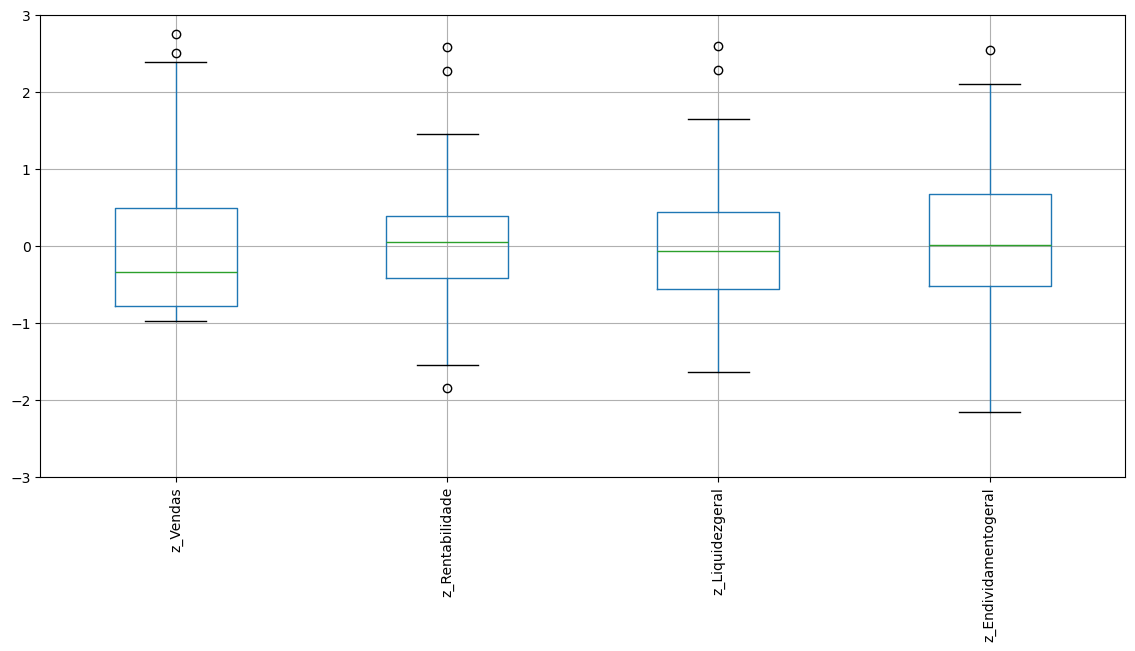

In [1903]:
# Outlier Univariado
df[z_variaveis].boxplot(rot=90,figsize=[14,6])
plt.ylim(-3,3)
plt.show()

### Mahalanobis

In [1905]:
# Média e matriz de covariância
mean_vector = X.mean().values
cov_matrix = np.cov(X.values, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

In [1906]:
# Outlier multivariado D2 de mahalanobis
# Regra do número de variáveis vezes 2.5 (se maior, outlier)

# Função para calcular o D² de Mahalanobis (sem raiz)
def mahalanobis_d2(row, mean_vector, inv_cov_matrix):
    diff = row - mean_vector
    return np.dot(np.dot(diff, inv_cov_matrix), diff.T)


In [1907]:
# Calcula a distância de D2Mahalanobis para cada um dos casos.
df['mahalanobis_d2'] = X.apply(lambda row: mahalanobis_d2(row.values, mean_vector, inv_cov_matrix), axis=1)
df.head()

,Empresa,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral,z_Vendas,z_Rentabilidade,z_Liquidezgeral,z_Endividamentogeral,mahalanobis_d2
0,TELEMAR,7696136,7.836,0.4218,55.977,2.751981,-0.482482,-1.032848,-0.043252,7.937777
1,TELEFONICA,7256514,14.137,0.6093,38.128,2.500772,-0.050212,-0.535966,-1.294151,8.922817
2,CBB/AMBEV,7055807,10.649,0.6162,66.055,2.386084,-0.289500,-0.517680,0.663036,5.822499
3,IPIRANGA,6405875,16.643,1.2257,51.256,2.014700,0.121708,1.097520,-0.374111,6.748602
4,VALE DO RIO DOCE,5543249,17.482,0.3515,32.145,1.521779,0.179266,-1.219146,-1.713453,7.623577


In [1908]:
# Os casos mais distantes da média. Os mais diferentes.
df.loc[df['mahalanobis_d2'] > 10]

,Empresa,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral,z_Vendas,z_Rentabilidade,z_Liquidezgeral,z_Endividamentogeral,mahalanobis_d2
9,FIAT,4145717,-39.121,0.9754,68.299,0.723201,-3.703888,0.434215,0.820301,17.18321


### Método Hierárquico Aglomerativo

In [1910]:
Z = linkage(df[z_variaveis], method='single', metric='sqeuclidean')

In [1911]:
Z

array([[37.        , 47.        ,  0.23340563,  2.        ],
       [39.        , 48.        ,  0.26205619,  3.        ],
       [18.        , 30.        ,  0.26886874,  2.        ],
       [21.        , 50.        ,  0.29920644,  3.        ],
       [ 7.        ,  8.        ,  0.30037509,  2.        ],
       [28.        , 49.        ,  0.30652503,  4.        ],
       [51.        , 53.        ,  0.31980538,  7.        ],
       [42.        , 54.        ,  0.36638497,  8.        ],
       [31.        , 33.        ,  0.38739349,  2.        ],
       [17.        , 24.        ,  0.44816616,  2.        ],
       [55.        , 57.        ,  0.45616027, 10.        ],
       [27.        , 58.        ,  0.61799704, 11.        ],
       [38.        , 46.        ,  0.61958118,  2.        ],
       [15.        , 59.        ,  0.62633999, 12.        ],
       [22.        , 61.        ,  0.6282071 , 13.        ],
       [13.        , 62.        ,  0.65752182, 14.        ],
       [16.        , 63.

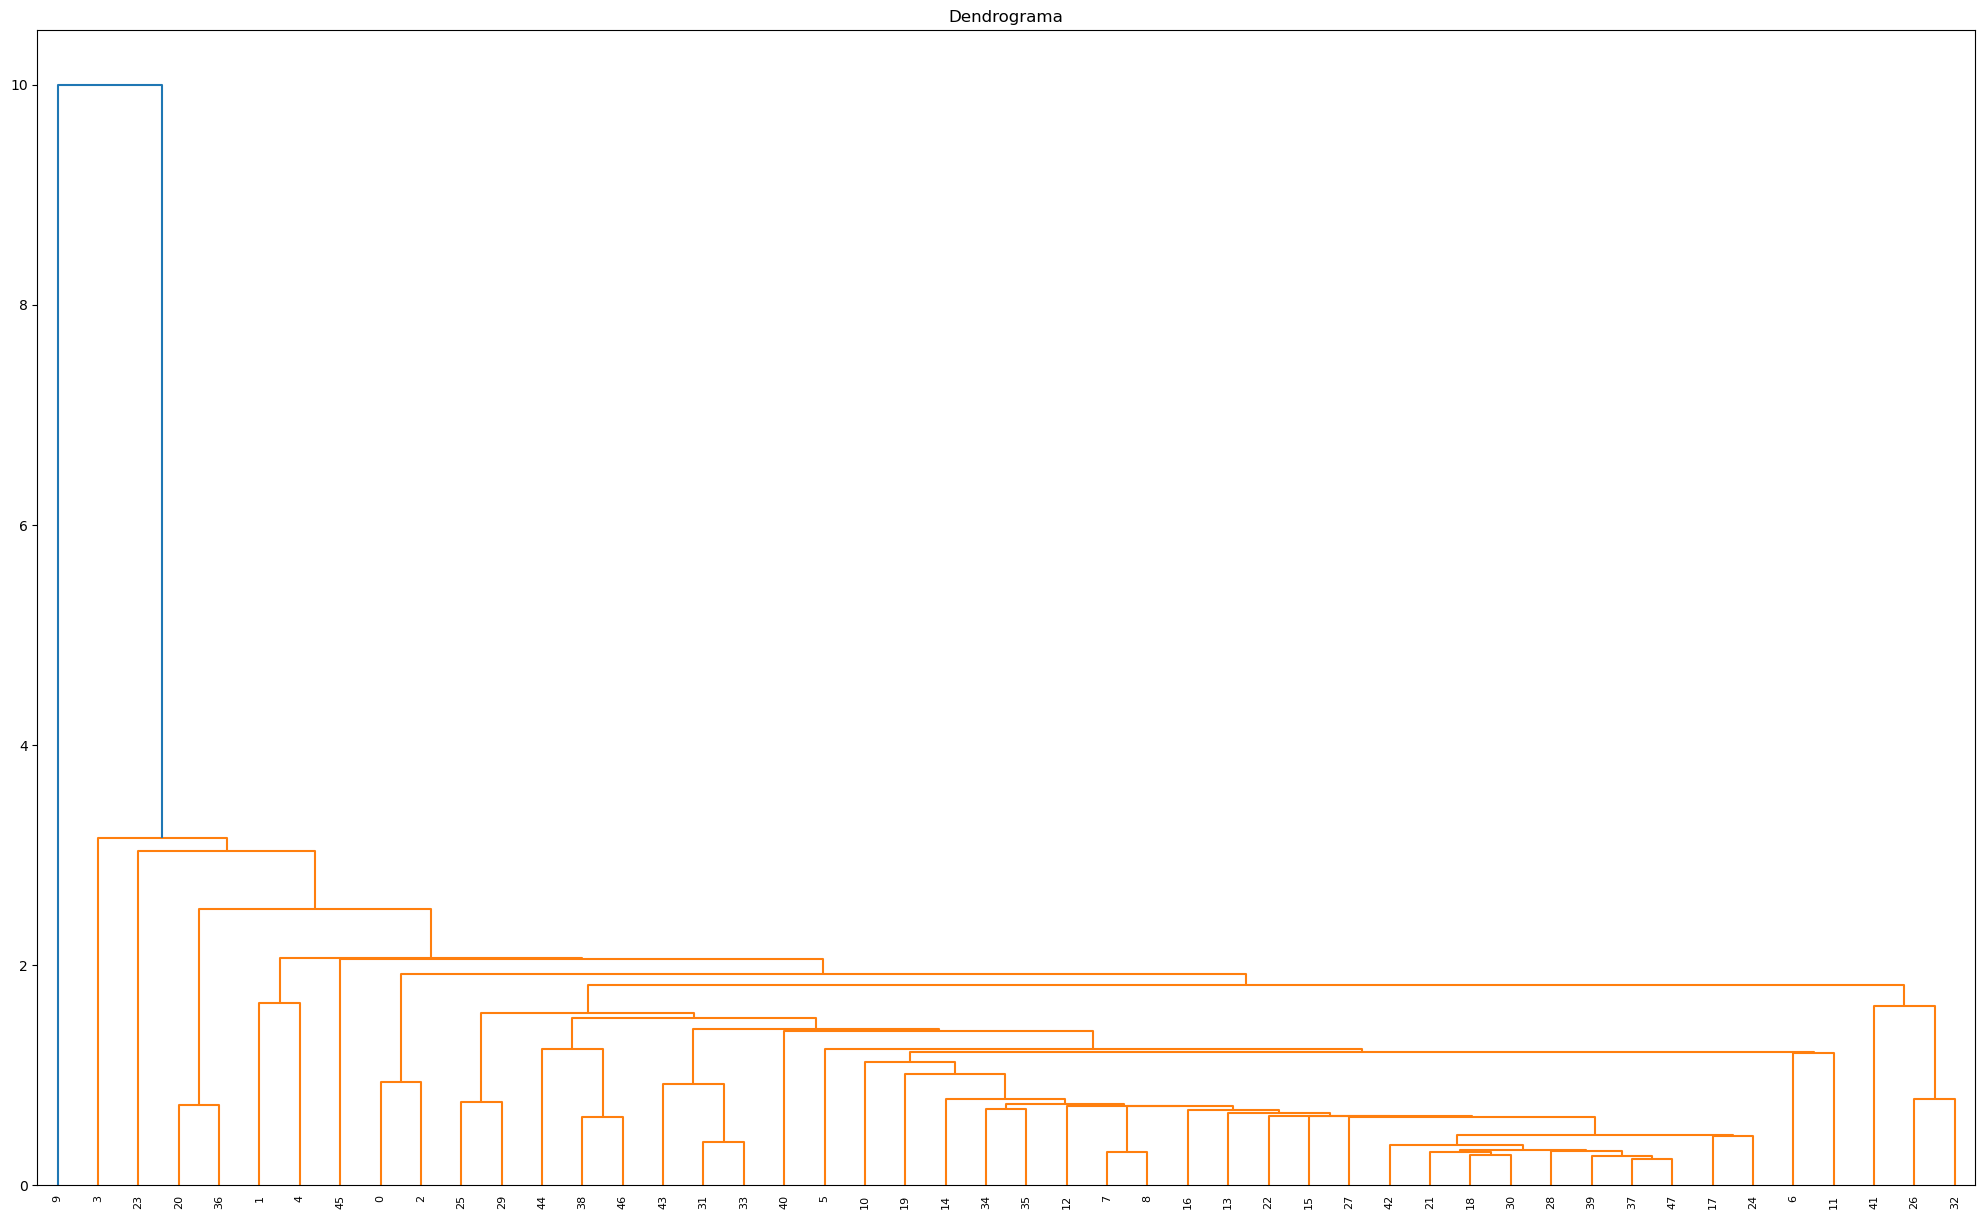

In [1912]:
fig = plt.figure(figsize=(25, 15))
dn = dendrogram(Z)
plt.title("Dendrograma") 
plt.show()

In [1913]:
# Transforma a matriz Z em um DataFrame. Neste caso, será um DataFrame com 24 linhas e 4 colunas (Cluster 1 - c1, Cluster 2 - c2, distãncia - dist e 
# quantidade de casos - n)
parada = pd.DataFrame(Z, columns=["c1", "c2", "dist", "n"])

In [1914]:
parada.head()

,c1,c2,dist,n
0,37.0,47.0,0.233406,2.0
1,39.0,48.0,0.262056,3.0
2,18.0,30.0,0.268869,2.0
3,21.0,50.0,0.299206,3.0
4,7.0,8.0,0.300375,2.0


In [1915]:
parada.tail(10)

,c1,c2,dist,n
37,41.0,72.0,1.623536,3.0
38,1.0,4.0,1.653639,2.0
39,84.0,85.0,1.816257,38.0
40,74.0,87.0,1.914860,40.0
41,45.0,88.0,2.052044,41.0
42,86.0,89.0,2.061601,43.0
43,68.0,90.0,2.512649,45.0
44,23.0,91.0,3.035557,46.0
45,3.0,92.0,3.153245,47.0
46,9.0,93.0,9.995933,48.0


In [1916]:
# Cálculo da heterogeneidade. É a variação percentual da distância do estágio posterior em relação ao estágio atual
parada['heterogeneidade'] = ((parada['dist'].shift(-1) - parada['dist']) / parada['dist']) * 100

In [1917]:
parada["qt_cluster"] = range(len(parada), 0, -1)

In [1918]:
# Exibição das últimas 10 linhas dos DataFrame. Os últimos 10 estágios do processo hierárquico aglomerativo.
parada.tail(10)

,c1,c2,dist,n,heterogeneidade,qt_cluster
37,41.0,72.0,1.623536,3.0,1.854182,10
38,1.0,4.0,1.653639,2.0,9.833931,9
39,84.0,85.0,1.816257,38.0,5.428933,8
40,74.0,87.0,1.914860,40.0,7.164167,7
41,45.0,88.0,2.052044,41.0,0.465758,6
42,86.0,89.0,2.061601,43.0,21.878524,5
43,68.0,90.0,2.512649,45.0,20.811000,4
44,23.0,91.0,3.035557,46.0,3.876993,3
45,3.0,92.0,3.153245,47.0,217.004621,2
46,9.0,93.0,9.995933,48.0,NaN,1


### 4 grupos

In [1920]:
# Solução com 3 grupos, distância euclidiana quadrática e ligação single
cluster = AgglomerativeClustering(n_clusters=4, metric='sqeuclidean', linkage='single')  

In [1921]:
# Classificação de cada um dos 100 casos em um dos grupos (0,1 e 2)
cluster.fit_predict(df[z_variaveis])

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [1922]:
# Ajuste do agrupamento
cluster.fit(df[z_variaveis])

AgglomerativeClustering(linkage='single', metric='sqeuclidean', n_clusters=4)

In [1923]:
# Parâmetros utilizados
cluster.get_params()

{'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'single',
 'memory': None,
 'metric': 'sqeuclidean',
 'n_clusters': 4}

In [1924]:
# Exibição dos grupos para cada um dos casos
cluster.labels_

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [1925]:
# Número de Casos
cluster.n_leaves_

48

In [1926]:
# Número de clusters
cluster.n_clusters

4

In [1927]:
# Formação dos grupos - Aglomeração - Apresentação dos 5 primeiros passos.
cluster.children_[0:5]

array([[37, 47],
       [39, 48],
       [18, 30],
       [21, 50],
       [ 7,  8]])

In [1928]:
# Acerescenta uma coluna no DataFrame informando em qual grupo cada indivíduo foi alocado
df = pd.concat([df, pd.DataFrame(cluster.fit_predict(df[z_variaveis]), columns=['grupo_4'])], axis=1)

In [1929]:
df.head(3)

,Empresa,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral,z_Vendas,z_Rentabilidade,z_Liquidezgeral,z_Endividamentogeral,mahalanobis_d2,grupo_4
0,TELEMAR,7696136,7.836,0.4218,55.977,2.751981,-0.482482,-1.032848,-0.043252,7.937777,0
1,TELEFONICA,7256514,14.137,0.6093,38.128,2.500772,-0.050212,-0.535966,-1.294151,8.922817,0
2,CBB/AMBEV,7055807,10.649,0.6162,66.055,2.386084,-0.289500,-0.517680,0.663036,5.822499,0


In [1930]:
df.groupby('grupo_4').count()['Empresa']

grupo_4
0    45
1     1
2     1
3     1
Name: Empresa, dtype: int64

In [1931]:
# Restringindo dataframe para apenas dados numericos
df_numerico = df.select_dtypes(include=['number'])

In [1932]:
# Calcula a média das variáveis utilizadas na segamentação por grupo e gera um DataFrame
grupo_4 = df_numerico.groupby('grupo_4').mean()[z_variaveis].round(2)

In [1933]:
grupo_4

,z_Vendas,z_Rentabilidade,z_Liquidezgeral,z_Endividamentogeral
grupo_4,,,,
0,-0.05,0.05,-0.01,-0.07
1,-0.32,1.43,-1.11,2.54
2,2.01,0.12,1.10,-0.37
3,0.72,-3.70,0.43,0.82


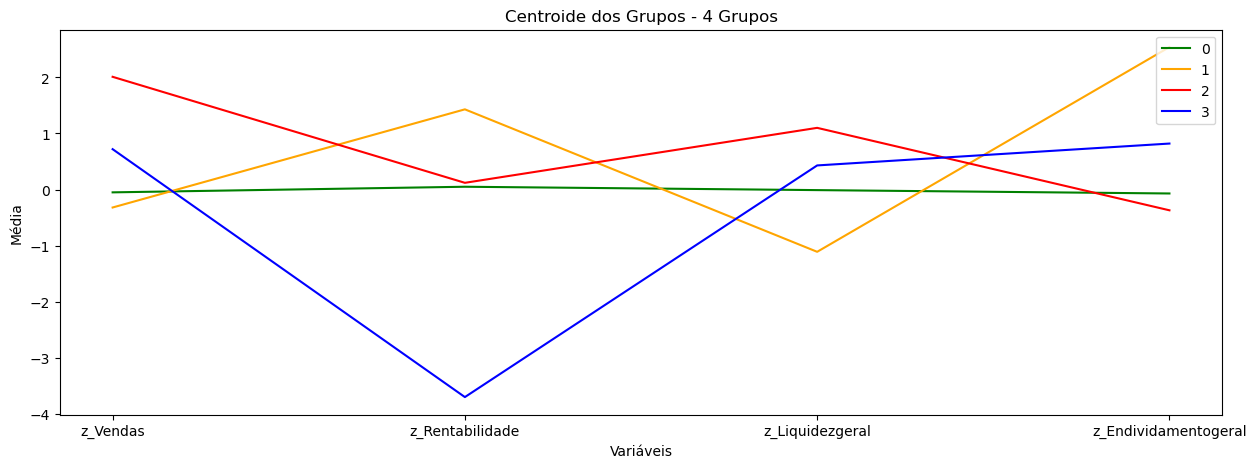

In [1934]:
# Gera um gráfico de linhas dos centros dos grupos
plt.figure(figsize=(15,5))
plt.plot(z_variaveis, grupo_4.loc[0], color='g')
plt.plot(z_variaveis, grupo_4.loc[1], color='orange')
plt.plot(z_variaveis, grupo_4.loc[2], color='red')
plt.plot(z_variaveis, grupo_4.loc[3], color='blue')
plt.xlabel('Variáveis')
plt.ylabel('Média')
plt.title('Centroide dos Grupos - 4 Grupos')
plt.legend(["0","1","2", "3"], loc=1)
plt.show()

### 3 grupos

In [1936]:
# Solução com 3 grupos, distância euclidiana quadrática e ligação single
cluster = AgglomerativeClustering(n_clusters=3, metric='sqeuclidean', linkage='single')  

In [1937]:
# Classificação de cada um dos 100 casos em um dos grupos (0,1 e 2)
cluster.fit_predict(df[z_variaveis])

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [1938]:
# Ajuste do agrupamento
cluster.fit(df[z_variaveis])

AgglomerativeClustering(linkage='single', metric='sqeuclidean', n_clusters=3)

In [1939]:
# Parâmetros utilizados
cluster.get_params()

{'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'single',
 'memory': None,
 'metric': 'sqeuclidean',
 'n_clusters': 3}

In [1940]:
# Exibição dos grupos para cada um dos casos
cluster.labels_

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [1941]:
# Número de Casos
cluster.n_leaves_

48

In [1942]:
# Número de clusters
cluster.n_clusters

3

In [1943]:
# Formação dos grupos - Aglomeração - Apresentação dos 5 primeiros passos.
cluster.children_[0:5]

array([[37, 47],
       [39, 48],
       [18, 30],
       [21, 50],
       [ 7,  8]])

In [1944]:
# Acerescenta uma coluna no DataFrame informando em qual grupo cada indivíduo foi alocado
df = pd.concat([df, pd.DataFrame(cluster.fit_predict(df[z_variaveis]), columns=['grupo_3'])], axis=1)

In [1945]:
df.head(3)

,Empresa,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral,z_Vendas,z_Rentabilidade,z_Liquidezgeral,z_Endividamentogeral,mahalanobis_d2,grupo_4,grupo_3
0,TELEMAR,7696136,7.836,0.4218,55.977,2.751981,-0.482482,-1.032848,-0.043252,7.937777,0,0
1,TELEFONICA,7256514,14.137,0.6093,38.128,2.500772,-0.050212,-0.535966,-1.294151,8.922817,0,0
2,CBB/AMBEV,7055807,10.649,0.6162,66.055,2.386084,-0.289500,-0.517680,0.663036,5.822499,0,0


In [1946]:
df.groupby('grupo_3').count()['Empresa']

grupo_3
0    46
1     1
2     1
Name: Empresa, dtype: int64

In [1947]:
# Restringindo dataframe para apenas dados numericos
df_numerico = df.select_dtypes(include=['number'])

In [1948]:
# Calcula a média das variáveis utilizadas na segamentação por grupo e gera um DataFrame
grupo_3 = df_numerico.groupby('grupo_3').mean()[z_variaveis].round(2)

In [1949]:
grupo_3

,z_Vendas,z_Rentabilidade,z_Liquidezgeral,z_Endividamentogeral
grupo_3,,,,
0,-0.06,0.08,-0.03,-0.01
1,0.72,-3.70,0.43,0.82
2,2.01,0.12,1.10,-0.37


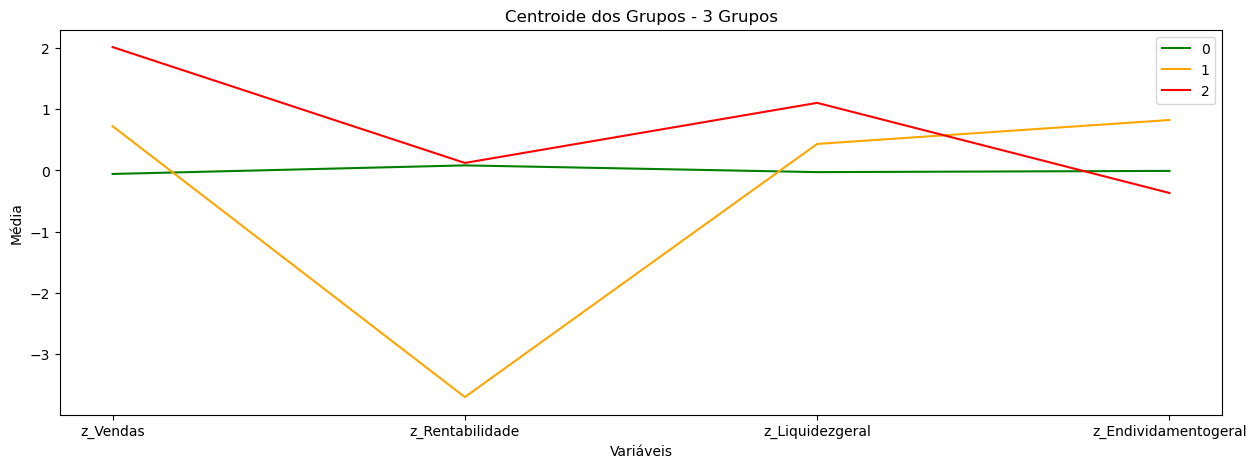

In [1950]:
# Gera um gráfico de linhas dos centros dos grupos
plt.figure(figsize=(15,5))
plt.plot(z_variaveis, grupo_3.loc[0], color='g')
plt.plot(z_variaveis, grupo_3.loc[1], color='orange')
plt.plot(z_variaveis, grupo_3.loc[2], color='red')
plt.xlabel('Variáveis')
plt.ylabel('Média')
plt.title('Centroide dos Grupos - 3 Grupos')
plt.legend(["0","1","2"], loc=1)
plt.show()

### 2 grupos

In [1952]:
# Solução com 3 grupos, distância euclidiana quadrática e ligação nearest neighbor 
cluster = AgglomerativeClustering(n_clusters=2, metric='sqeuclidean', linkage='single')  

In [1953]:
# Classificação de cada um dos 100 casos em um dos grupos (0,1 e 2)
cluster.fit_predict(df[z_variaveis])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [1954]:
# Ajuste do agrupamento
cluster.fit(df[z_variaveis])

AgglomerativeClustering(linkage='single', metric='sqeuclidean')

In [1955]:
# Parâmetros utilizados
cluster.get_params()

{'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'single',
 'memory': None,
 'metric': 'sqeuclidean',
 'n_clusters': 2}

In [1956]:
# Exibição dos grupos para cada um dos casos
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

In [1957]:
# Número de Casos
cluster.n_leaves_

48

In [1958]:
# Número de clusters
cluster.n_clusters

2

In [1959]:
# Formação dos grupos - Aglomeração - Apresentação dos 5 primeiros passos.
cluster.children_[0:5]

array([[37, 47],
       [39, 48],
       [18, 30],
       [21, 50],
       [ 7,  8]])

In [1960]:
# Acerescenta uma coluna no DataFrame informando em qual grupo cada indivíduo foi alocado
df = pd.concat([df, pd.DataFrame(cluster.fit_predict(df[z_variaveis]), columns=['grupo_2'])], axis=1)

In [1961]:
df.head(3)

,Empresa,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral,z_Vendas,z_Rentabilidade,z_Liquidezgeral,z_Endividamentogeral,mahalanobis_d2,grupo_4,grupo_3,grupo_2
0,TELEMAR,7696136,7.836,0.4218,55.977,2.751981,-0.482482,-1.032848,-0.043252,7.937777,0,0,0
1,TELEFONICA,7256514,14.137,0.6093,38.128,2.500772,-0.050212,-0.535966,-1.294151,8.922817,0,0,0
2,CBB/AMBEV,7055807,10.649,0.6162,66.055,2.386084,-0.289500,-0.517680,0.663036,5.822499,0,0,0


In [1962]:
df.groupby('grupo_2').count()['Empresa']

grupo_2
0    47
1     1
Name: Empresa, dtype: int64

In [1963]:
# Restringindo dataframe para apenas dados numericos
df_numerico = df.select_dtypes(include=['number'])

In [1964]:
# Calcula a média das variáveis utilizadas na segamentação por grupo e gera um DataFrame
grupo_2 = df_numerico.groupby('grupo_2').mean()[z_variaveis].round(2)

In [1965]:
grupo_2

,z_Vendas,z_Rentabilidade,z_Liquidezgeral,z_Endividamentogeral
grupo_2,,,,
0,-0.02,0.08,-0.01,-0.02
1,0.72,-3.70,0.43,0.82


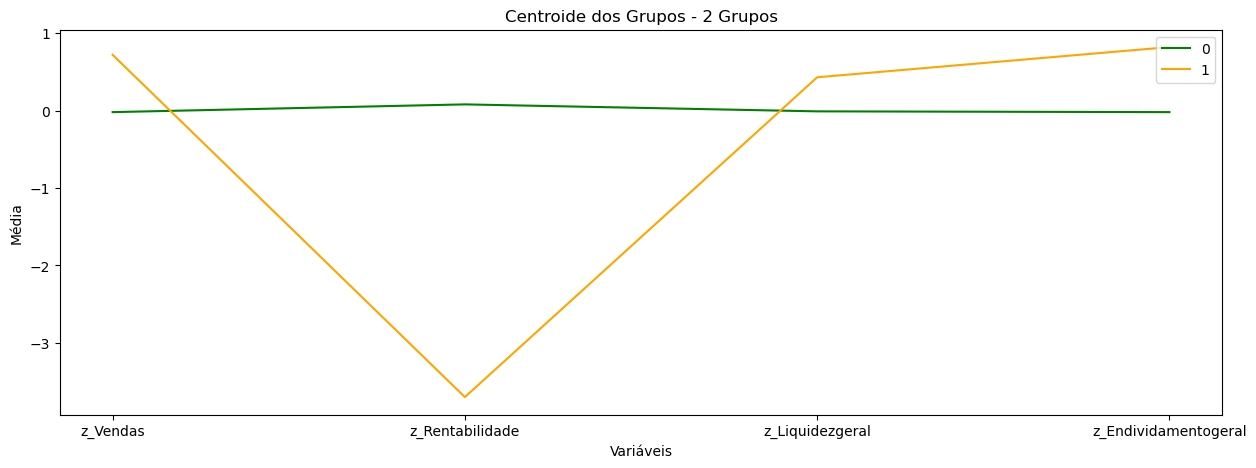

In [1966]:
# Gera um gráfico de linhas dos centros dos grupos
plt.figure(figsize=(15,5))
plt.plot(z_variaveis, grupo_2.loc[0], color='g')
plt.plot(z_variaveis, grupo_2.loc[1], color='orange')
plt.xlabel('Variáveis')
plt.ylabel('Média')
plt.title('Centroide dos Grupos - 2 Grupos')
plt.legend(["0","1"], loc=1)
plt.show()

### K-Means

In [1968]:
# Execução do algoritmo kmeans para 4 grupos e a semente dos centros é o centróide obtido na análise hierárquica
kmeans = KMeans(n_clusters=4, init=grupo_4, n_init=1).fit(df[z_variaveis])

C:\Users\marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [1969]:
kmeans

KMeans(init=         z_Vendas  z_Rentabilidade  z_Liquidezgeral  z_Endividamentogeral
grupo_4                                                                  
0           -0.05             0.05            -0.01                 -0.07
1           -0.32             1.43            -1.11                  2.54
2            2.01             0.12             1.10                 -0.37
3            0.72            -3.70             0.43                  0.82,
       n_clusters=4, n_init=1)

In [1970]:
# Agrupa cada um dos elementos da amostra em um dos 4 grupos possíveis.
y_kmeans = kmeans.predict(df[z_variaveis])

In [1971]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [1972]:
# Atribui o grupo para cada um dos casos no DataFrame
df['kmeans'] = kmeans.labels_

In [1973]:
df.head(3)

,Empresa,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral,z_Vendas,z_Rentabilidade,z_Liquidezgeral,z_Endividamentogeral,mahalanobis_d2,grupo_4,grupo_3,grupo_2,kmeans
0,TELEMAR,7696136,7.836,0.4218,55.977,2.751981,-0.482482,-1.032848,-0.043252,7.937777,0,0,0,2
1,TELEFONICA,7256514,14.137,0.6093,38.128,2.500772,-0.050212,-0.535966,-1.294151,8.922817,0,0,0,2
2,CBB/AMBEV,7055807,10.649,0.6162,66.055,2.386084,-0.289500,-0.517680,0.663036,5.822499,0,0,0,2


In [1974]:
# Quantidade de casos por grupo
lens = []
for i in np.sort(list(df['kmeans'].unique())):
    lens.append(len(df.loc[df['kmeans'] == i,:]))
    print("Cluster ", i, ": ", lens[i])

Cluster  0 :  31
Cluster  1 :  8
Cluster  2 :  8
Cluster  3 :  1


In [1975]:
# Quantidade de casos por grupo
df.groupby('kmeans').count()['Empresa']

kmeans
0    31
1     8
2     8
3     1
Name: Empresa, dtype: int64

In [1976]:
df_numerico = df.select_dtypes(include=['number'])

In [1977]:
# Gera o centroide final dos grupos.
k_means_centro = df_numerico.groupby('kmeans').mean()[z_variaveis].round(2)

In [1978]:
k_means_centro

,z_Vendas,z_Rentabilidade,z_Liquidezgeral,z_Endividamentogeral
kmeans,,,,
0,-0.52,-0.08,0.26,-0.33
1,0.10,0.97,-0.71,1.42
2,1.83,-0.18,-0.34,-0.23
3,0.72,-3.70,0.43,0.82


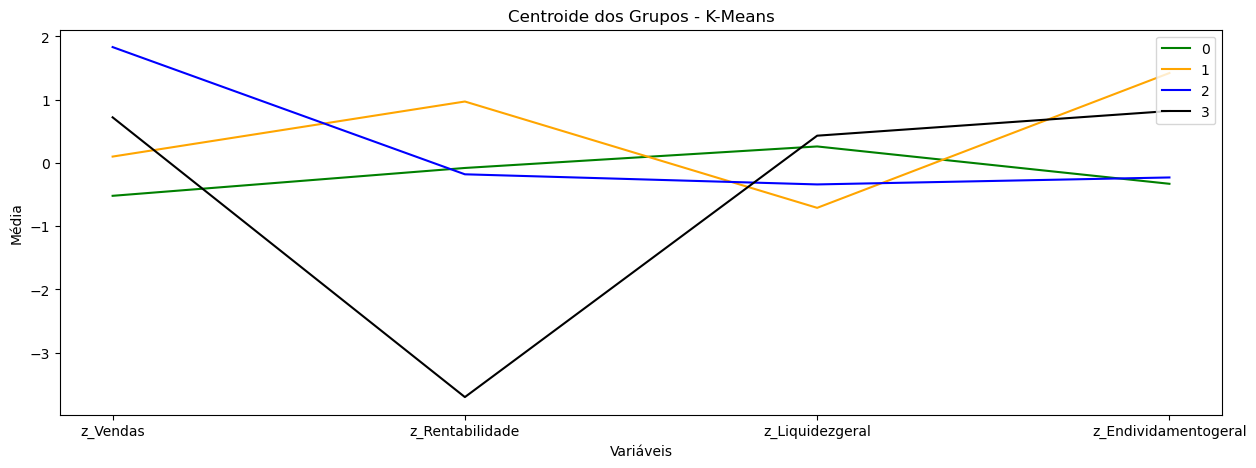

In [1979]:
# Gera um gráfico de linhas dos centros dos grupos - KMeans

plt.figure(figsize=(15,5))
plt.plot(z_variaveis, k_means_centro.loc[0], color='g')
plt.plot(z_variaveis, k_means_centro.loc[1], color='orange')
plt.plot(z_variaveis, k_means_centro.loc[2], color='blue')
plt.plot(z_variaveis, k_means_centro.loc[3], color='Black')
plt.xlabel('Variáveis')
plt.ylabel('Média')
plt.title('Centroide dos Grupos - K-Means')
plt.legend(["0","1", "2", "3"], loc=1)
plt.show()

### Centros dos grupos

In [1981]:
clusters_labels = pd.DataFrame(kmeans.labels_)
clusters_labels = clusters_labels.drop_duplicates().sort_values(0)

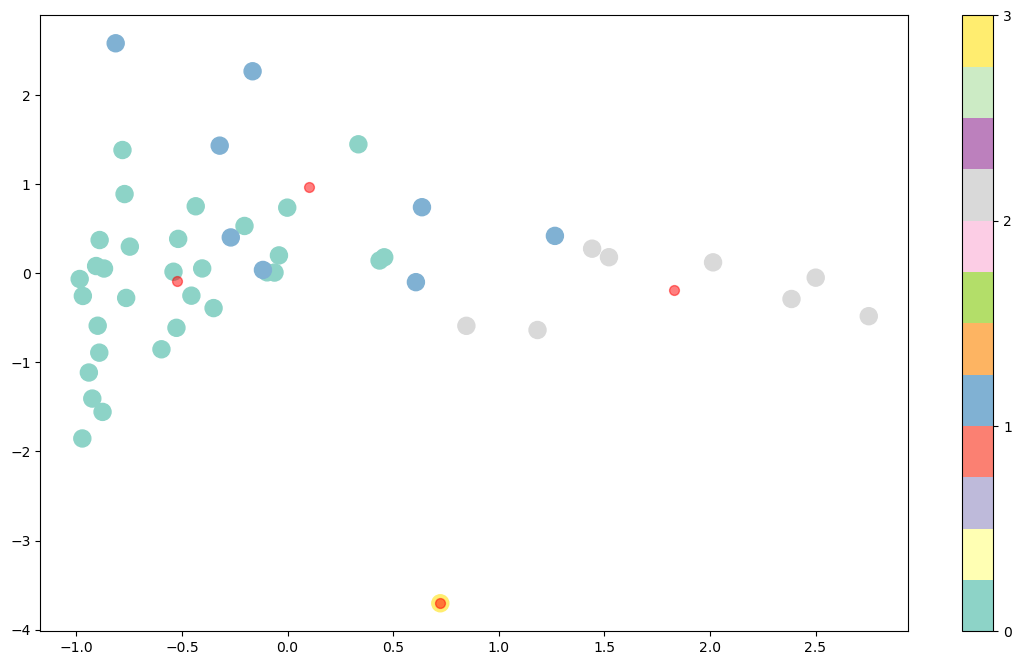

In [1982]:
# Plota pares de variáveis e os centros dos grupos

plt.figure(figsize=(14, 8))
plt.scatter(df["z_Vendas"].tolist(), df["z_Rentabilidade"].tolist(), c=y_kmeans, s=150, cmap='Set3')

# Certifique-se de que clusters_labels seja 1D
plt.colorbar(spacing='uniform', ticks=np.array(clusters_labels).flatten())

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.5)

plt.show()

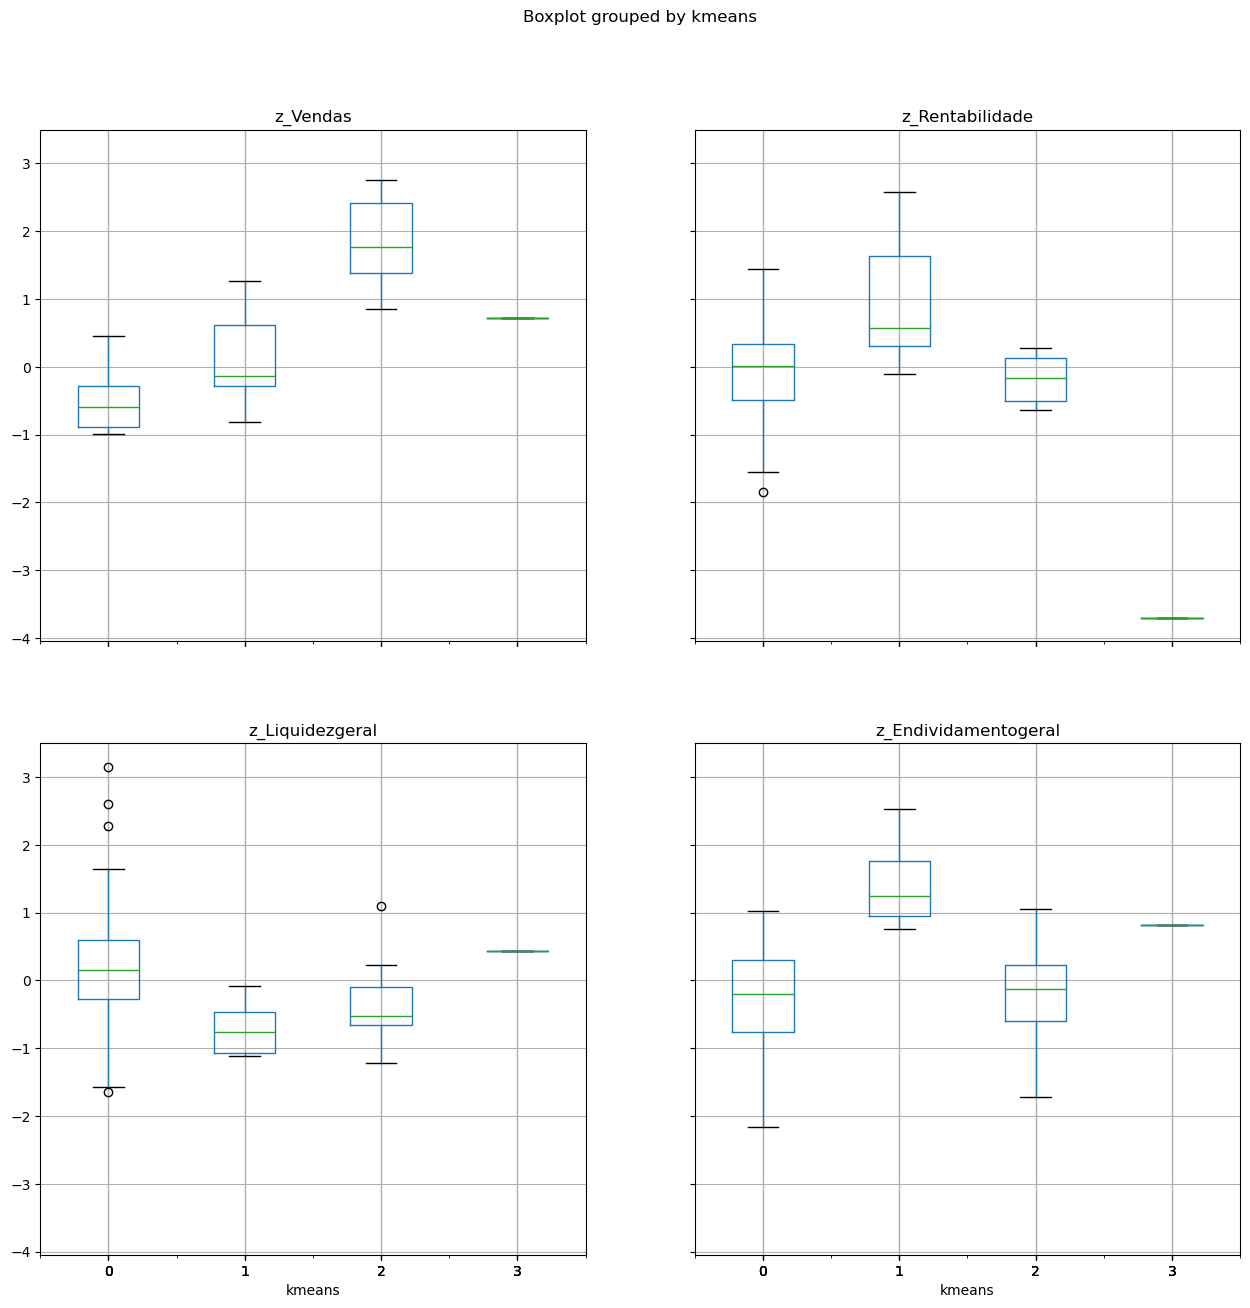

In [1983]:
# Boxplot das variáveis originais por grupos.
boxplot = df.boxplot(column=z_variaveis, by='kmeans', layout=(2,2), figsize=[15,15], showfliers=True)
plt.show()

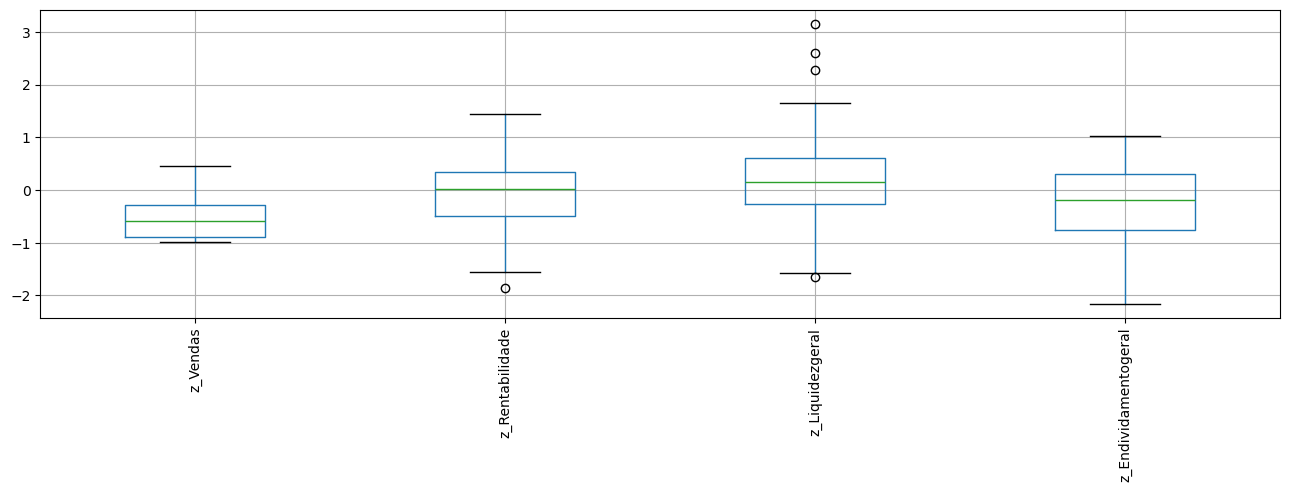

In [1984]:
# Boxplot do kmeans cluster 1 das variáveis
df_0 = df.loc[df['kmeans'] == 0]
ax = df_0[z_variaveis].boxplot(showfliers=True, figsize=[16,4], rot=90)
plt.show()

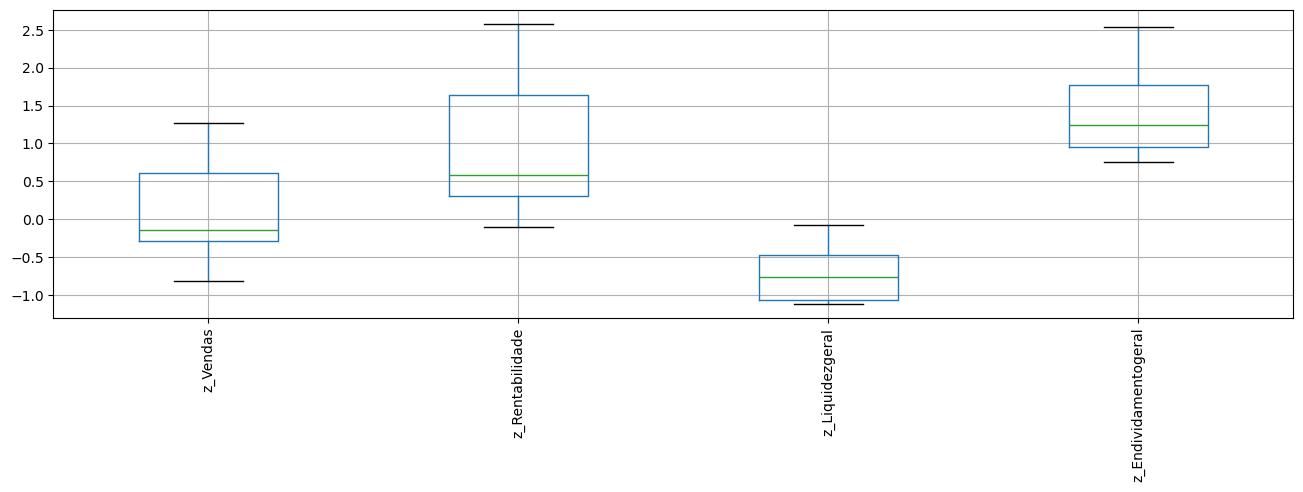

In [1985]:
# Boxplot do kmeans cluster 2 das variáveis
df_0 = df.loc[df['kmeans'] == 1]
ax = df_0[z_variaveis].boxplot(showfliers=True, figsize=[16,4], rot=90)
plt.show()

### ANOVA

In [1987]:
rs.summary_cont(df['z_Vendas'].groupby(df['kmeans']))

,N,Mean,SD,SE,95% Conf.,Interval
kmeans,,,,,,
0,31,-0.5224,0.4348,0.0781,-0.6818,-0.3629
1,8,0.1029,0.6731,0.2380,-0.4598,0.6656
2,8,1.8309,0.6839,0.2418,1.2592,2.4027
3,1,0.7232,NaN,NaN,NaN,NaN


In [1988]:
print(f"{'Variável':<10}{'QMC':>10}{'df1':>10}{'QME':>10}{'df2':>10}{'F':>10}{'p-valor':>10}\n")
for i in range(len(z_variaveis)):
    formula = z_variaveis[i] + '~ C(kmeans)'
    model = ols(formula, df).fit()
    aov_table = pd.DataFrame(stm.stats.anova.anova_lm(model, typ=1))
    print(f"{z_variaveis[i]:<10}{'{:.3f}'.format(aov_table.iloc[0,2].round(3)):>10}{'{:.0f}'.format(aov_table.iloc[0,0].round()):>10}\
{'{:.3f}'.format(aov_table.iloc[1,2].round(3)):>10}{'{:.0f}'.format(aov_table.iloc[1,0].round()):>10} \
{'{:.3f}'.format(aov_table.iloc[0,3].round(3)):>10}{'{:.3f}'.format(aov_table.iloc[0,4].round(3)):>10}") 

Variável         QMC       df1       QME       df2         F   p-valor

z_Vendas      11.962         3     0.275        44     43.442     0.000
z_Rentabilidade     7.253         3     0.596        44     12.163     0.000
z_Liquidezgeral     2.372         3     0.929        44      2.552     0.068
z_Endividamentogeral     6.847         3     0.624        44     10.972     0.000
